In [1]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.9.1


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:600]
test_labels = test_labels[:100]

train_images = train_images[:600].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:100].reshape(-1, 28 * 28) / 255.0

In [32]:
# Define a simple sequential model
def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(784,)),
    keras.layers.Dense(64, activation ="elu"),
    keras.layers.Dense(32, activation ="elu"),
    keras.layers.Dense(16, activation ="elu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_46 (Dense)            (None, 10)                170       
                                                                 
Total params: 111,514
Trainable params: 111,514
Non-tr

In [33]:


# Train the model with the new callback
classical_model = model.fit(train_images,
          train_labels,
          epochs=150,
          shuffle=True,
          batch_size=64,
          validation_data=(test_images, test_labels),
          )  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/150
10/10 [==============================] - 0s 16ms/step - loss: 1.9499 - accuracy: 0.3783 - val_loss: 1.5865 - val_accuracy: 0.5900
Epoch 2/150
10/10 [==============================] - 0s 4ms/step - loss: 1.3430 - accuracy: 0.6167 - val_loss: 1.2199 - val_accuracy: 0.6900
Epoch 3/150
10/10 [==============================] - 0s 4ms/step - loss: 0.9799 - accuracy: 0.7633 - val_loss: 0.9704 - val_accuracy: 0.7500
Epoch 4/150
10/10 [==============================] - 0s 5ms/step - loss: 0.7857 - accuracy: 0.8017 - val_loss: 0.8267 - val_accuracy: 0.7700
Epoch 5/150
10/10 [==============================] - 0s 5ms/step - loss: 0.6302 - accuracy: 0.8450 - val_loss: 0.7579 - val_accuracy: 0.7800
Epoch 6/150
10/10 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.8717 - val_loss: 0.6628 - val_accuracy: 0.8200
Epoch 7/150
10/10 [==============================] - 0s 4ms/step - loss: 0.4091 - accuracy: 0.9033 - val_loss: 0.6156 - val_accuracy: 0.8200
Epoch 8/150


In [13]:
# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 0s - loss: 1.7947 - sparse_categorical_accuracy: 0.3500 - 20ms/epoch - 5ms/step
Untrained model, accuracy: 35.00%


In [34]:
import matplotlib.pyplot as plt

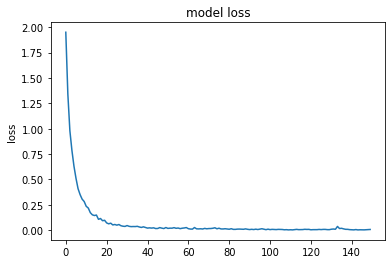

In [35]:
# ===================================================================================
#                                  Loss History Plot
# ===================================================================================

plt.title('model loss')
plt.plot(classical_model.history['loss'])
plt.ylabel('loss')
plt.show()

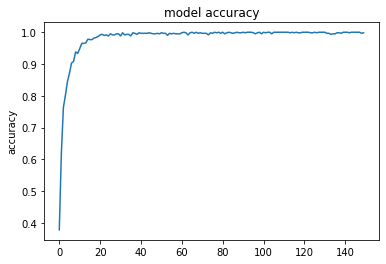

In [36]:
# ===================================================================================
#                                Accuracy History Plot
# ===================================================================================

plt.title('model accuracy')
plt.plot(classical_model.history['accuracy'])
plt.ylabel('accuracy')
plt.show()

In [43]:
model.save("classical_model")

INFO:tensorflow:Assets written to: classical_model\assets


In [48]:
import pickle

# save:
f = open('history_classical_model.pckl', 'wb')
pickle.dump(classical_model.history, f)
f.close()